In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('cleaned.csv')
df1 = df.drop(['following_list', 'followed_list', 'locations', 'type_list', 'Unnamed: 0', 'followed_n'], axis=1)
df1.describe()

,id,following_n,commit_n,public_repos,public_gists
count,3.390000e+02,339.000000,339.000000,339.000000,339.000000
mean,5.897615e+06,211.592920,435.392330,38.076696,10.879056
std,5.140349e+06,2631.137856,233.019521,48.356786,30.323309
min,1.180000e+02,0.000000,103.000000,0.000000,0.000000
25%,1.005478e+06,1.000000,229.000000,14.000000,0.000000
50%,5.633006e+06,7.000000,412.000000,25.000000,1.000000
75%,1.006808e+07,36.000000,613.000000,45.000000,7.000000
max,2.533413e+07,48239.000000,899.000000,426.000000,236.000000


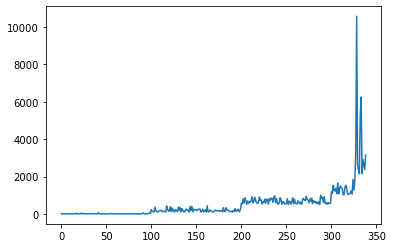

In [3]:
x = np.arange(339)
y = df['followed_n']
plt.plot(x, y)

In [4]:
df1['follower_range'] = 0

In [5]:
for i in range(100):
    df1['follower_range'].iloc[i] = 'followers0-100'
for i in range(100, 200):
    df1['follower_range'].iloc[i] = 'followers100-500'
for i in range(200, 300):
    df1['follower_range'].iloc[i] = 'followers500-1000'
for i in range(300, 327):
    df1['follower_range'].iloc[i] = 'followers1000-2000'
for i in range(327, 339):
    df1['follower_range'].iloc[i] = 'followers2000'

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
df1 = df1.drop(index=337)
df1

,id,following_n,commit_n,bio,public_repos,public_gists,follower_range
0,10074798,9,181,NaN,11,0,followers0-100
1,10067971,1,286,NaN,24,0,followers0-100
2,10040154,0,548,"Frontend developer: Javascript, React, DraftJS...",49,2,followers0-100
3,10047005,6,107,NaN,41,0,followers0-100
4,10017162,0,371,"""If the apocalypse comes, beep me.""",41,1,followers0-100
...,...,...,...,...,...,...,...
333,3346272,15,283,NaN,25,0,followers2000
334,368462,217,414,@W3cplus,45,124,followers2000
335,3734415,0,441,"The quieter you become, the more you are able ...",12,0,followers2000
336,3939305,50,353,welcome to http://litesuits.com,95,0,followers2000


In [7]:
#df1.to_csv('wordcloud_data.csv')

In [10]:
df1.to_csv('parallel_data.csv', index=False)

In [9]:
df1.isna().any()

id                False
following_n       False
commit_n          False
bio                True
public_repos      False
public_gists      False
follower_range    False
dtype: bool

In [13]:
# add mean to data

mean_df = df1.groupby('follower_range').mean().drop(['id'], axis=1)
mean_df.to_csv('means.csv')